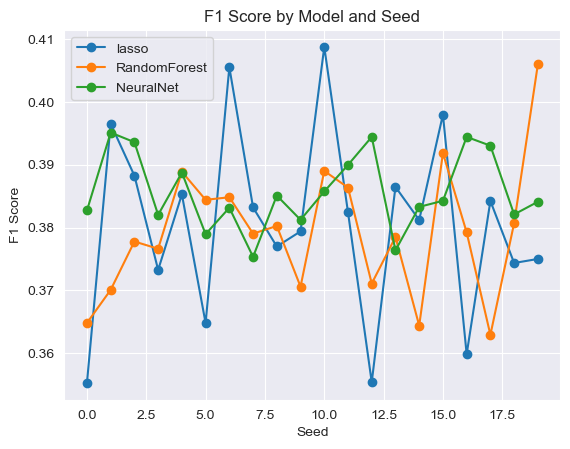

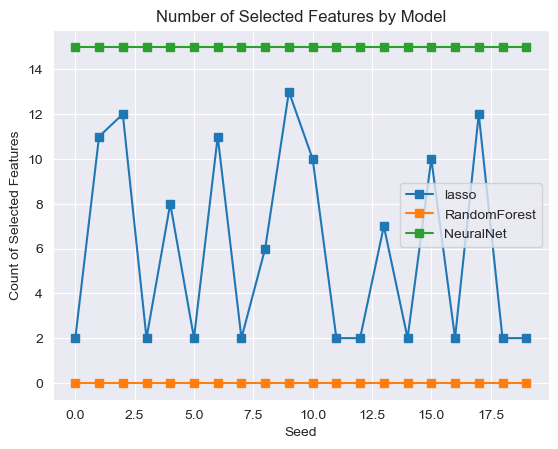

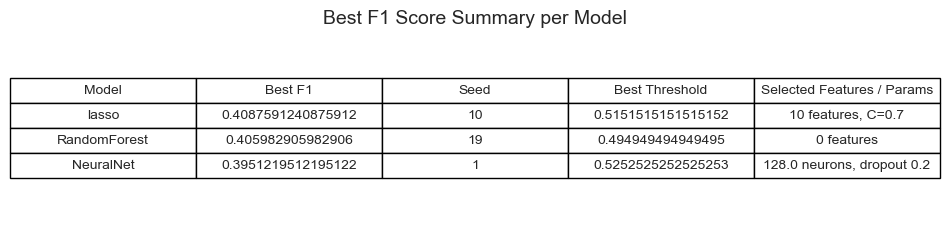

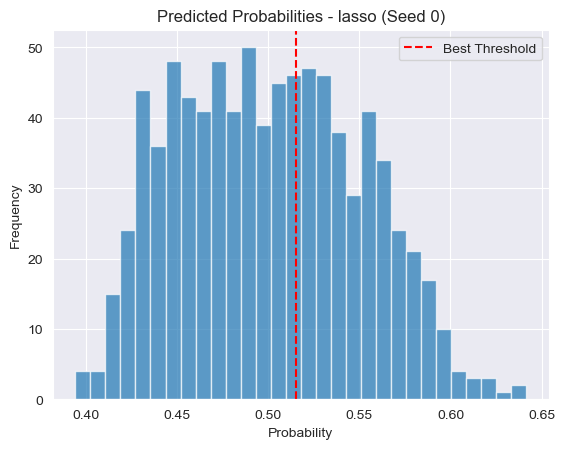

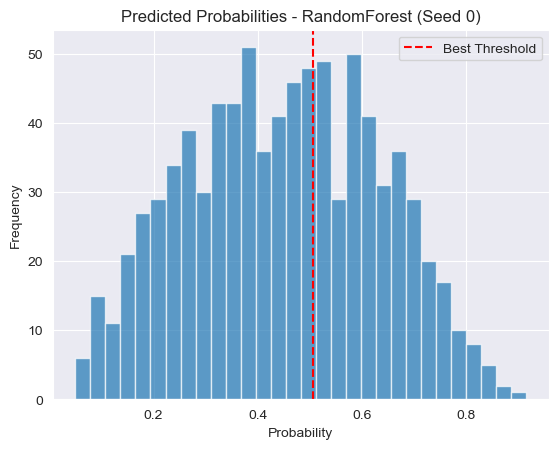

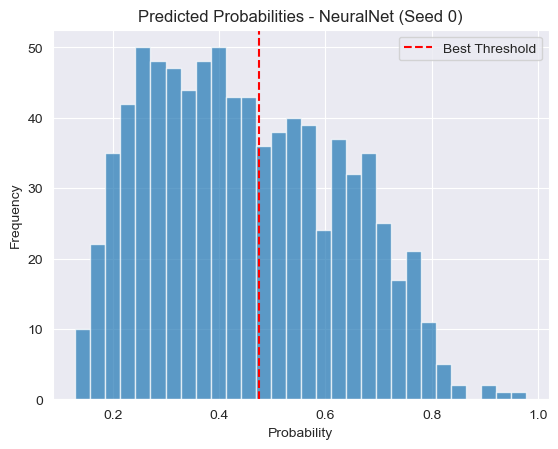

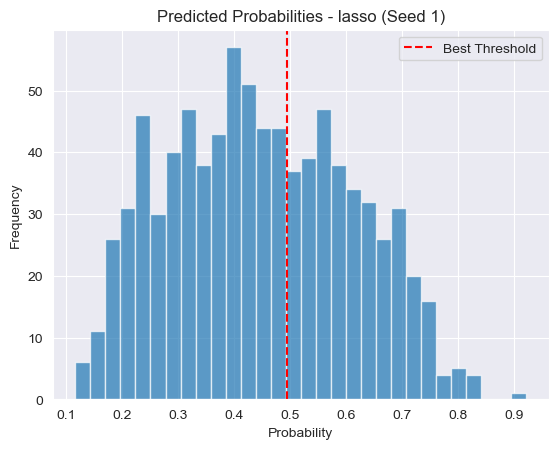

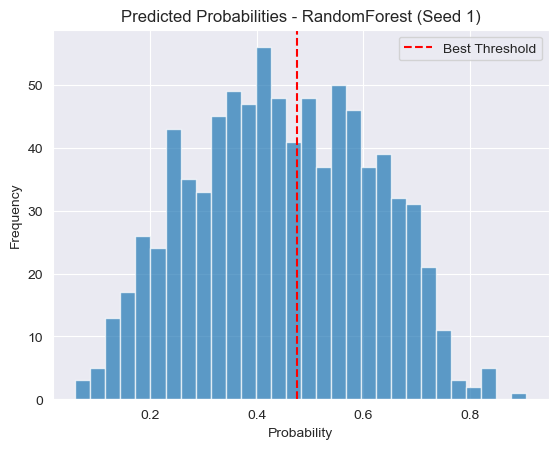

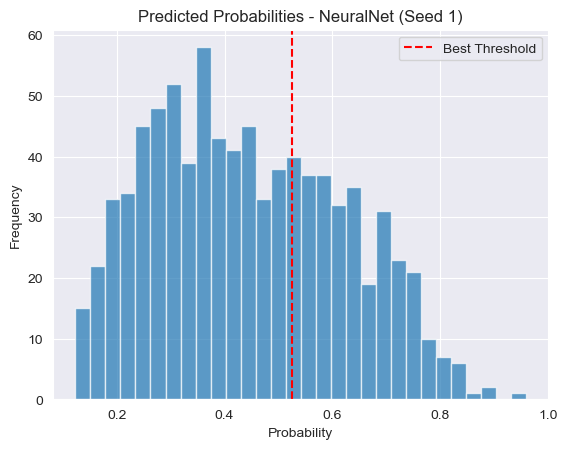

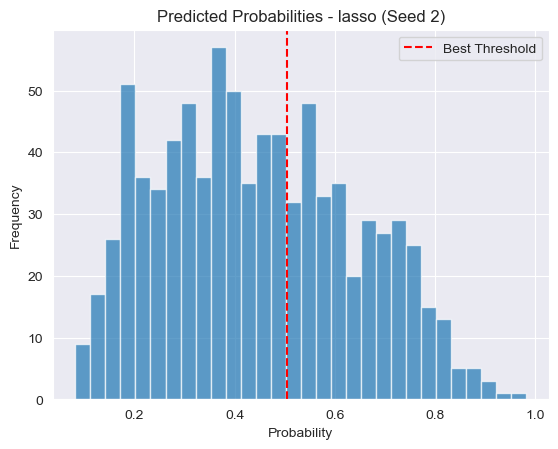

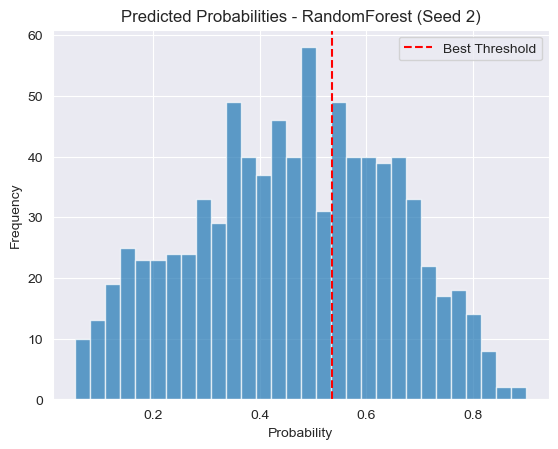

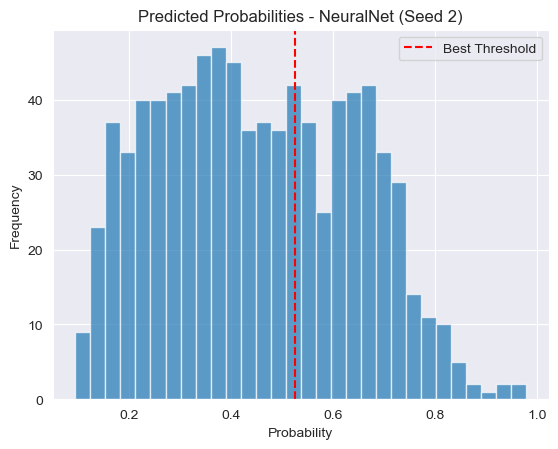

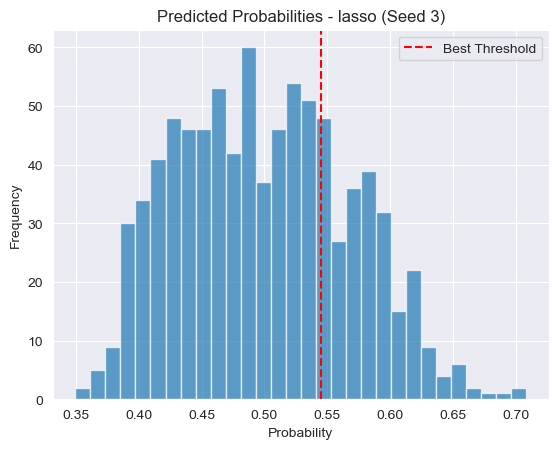

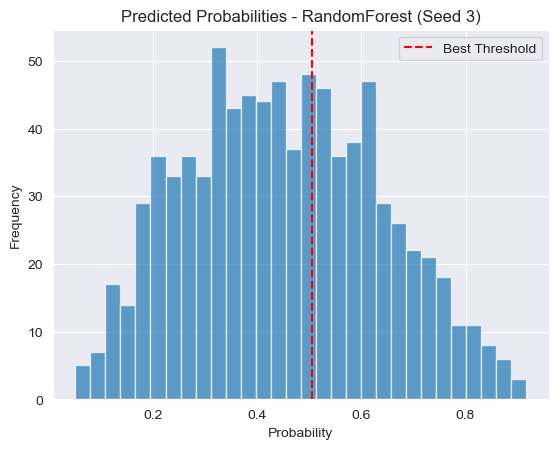

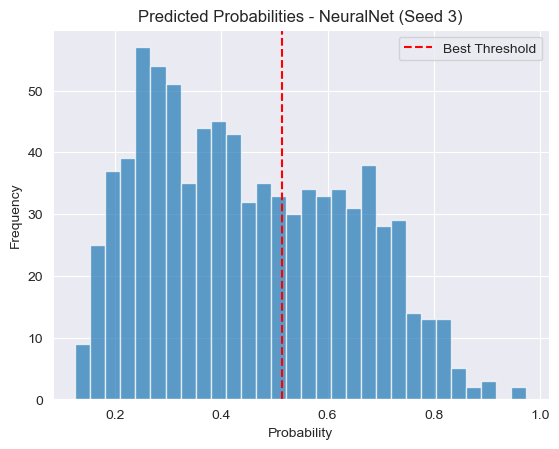

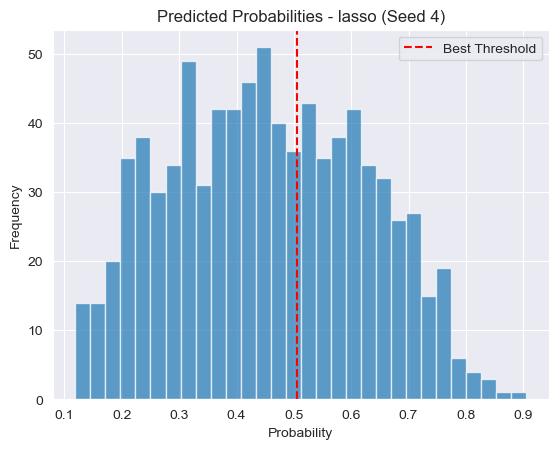

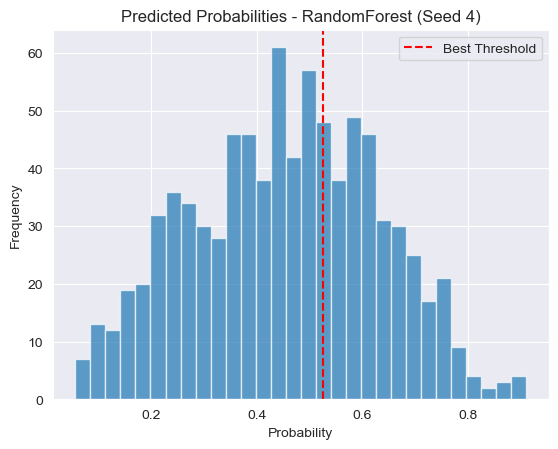

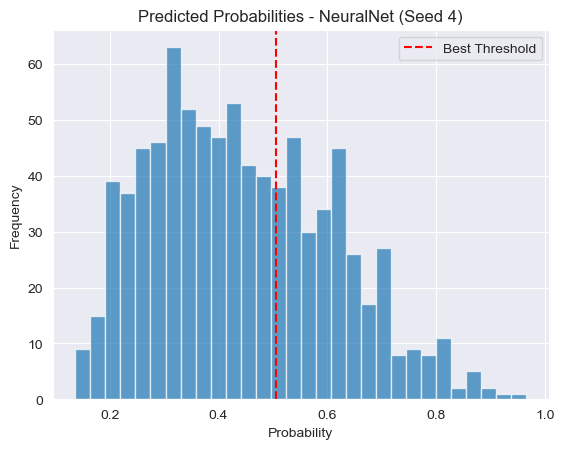

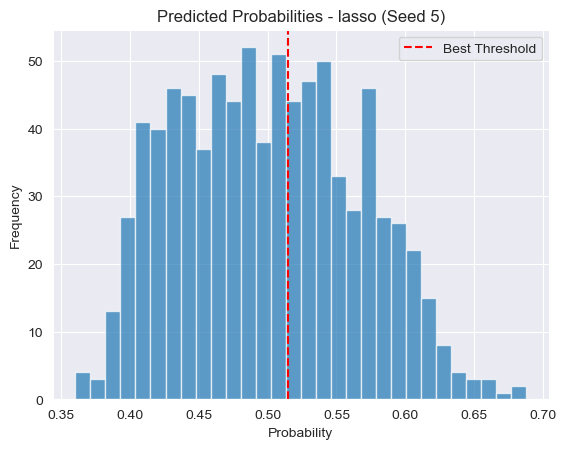

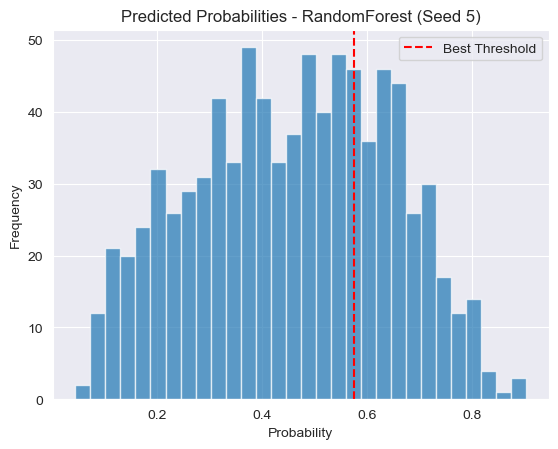

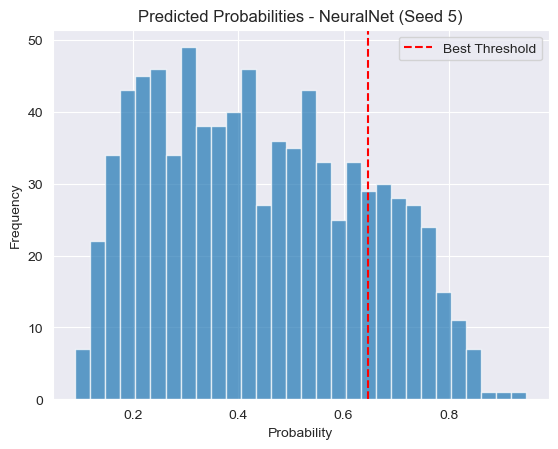

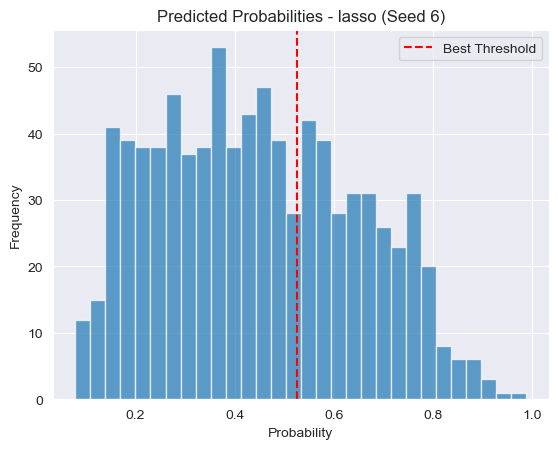

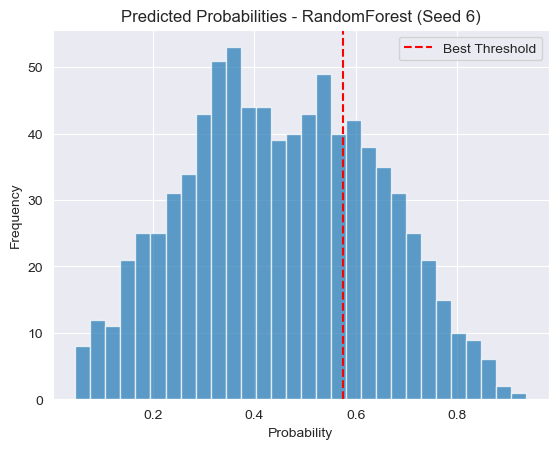

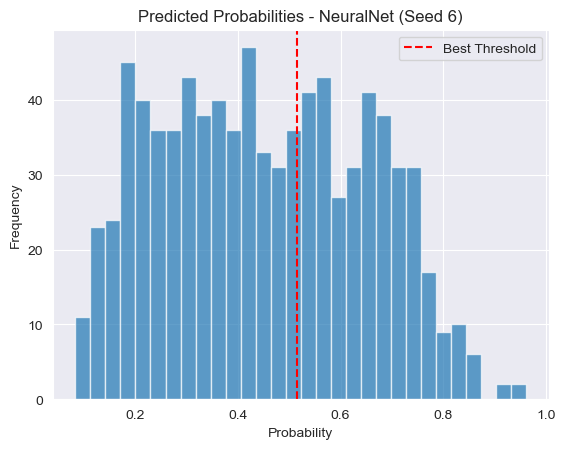

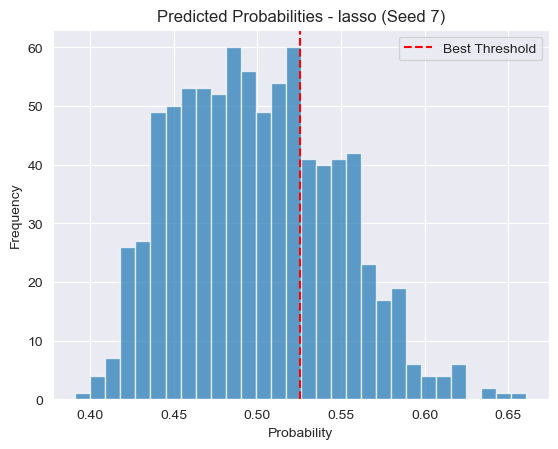

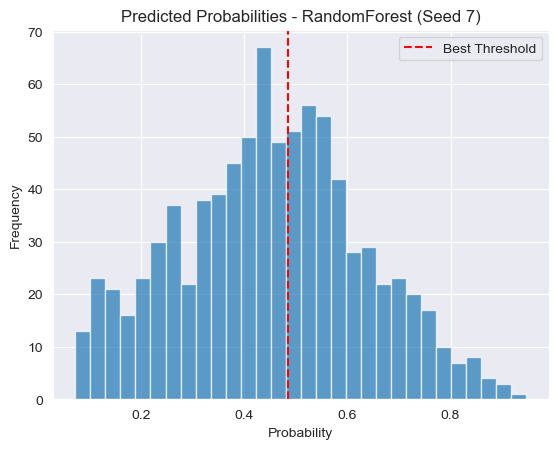

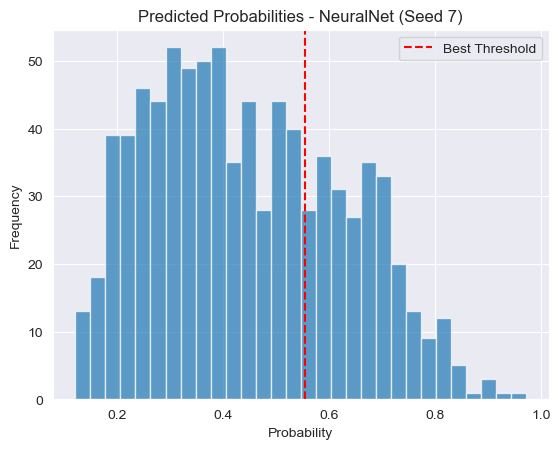

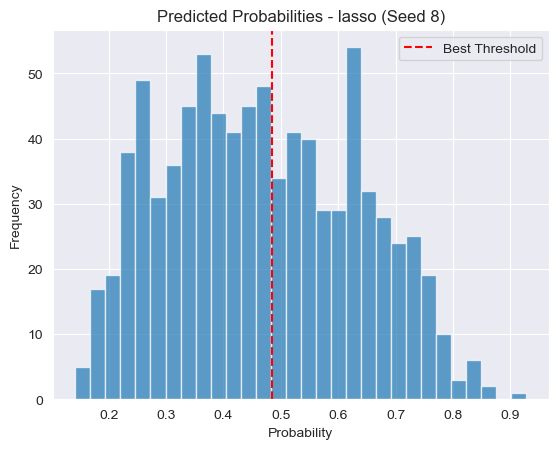

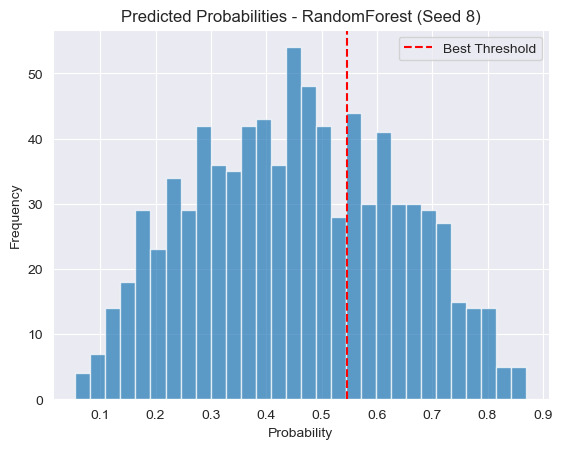

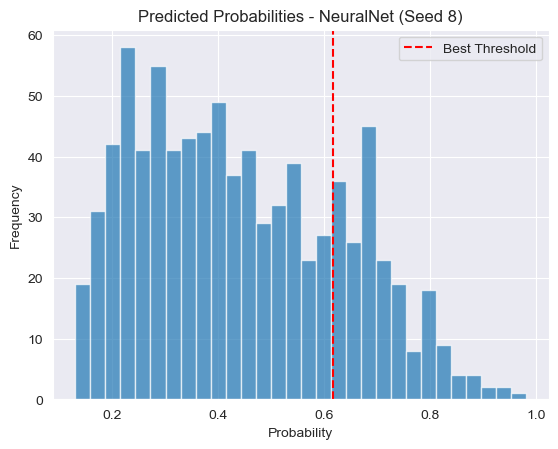

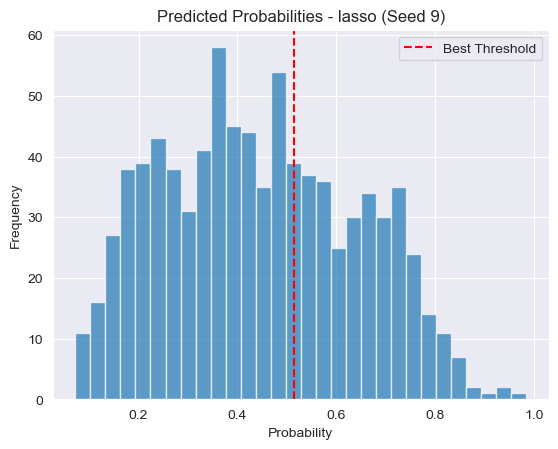

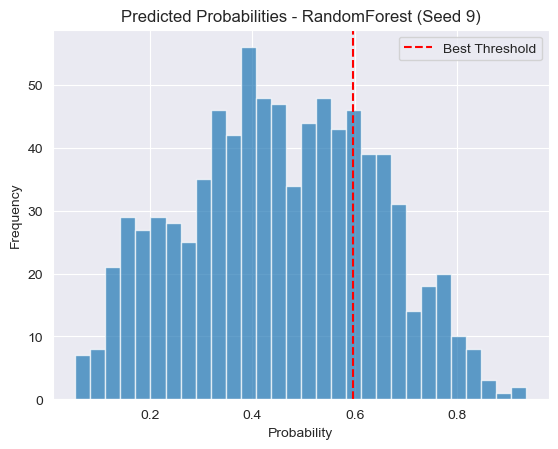

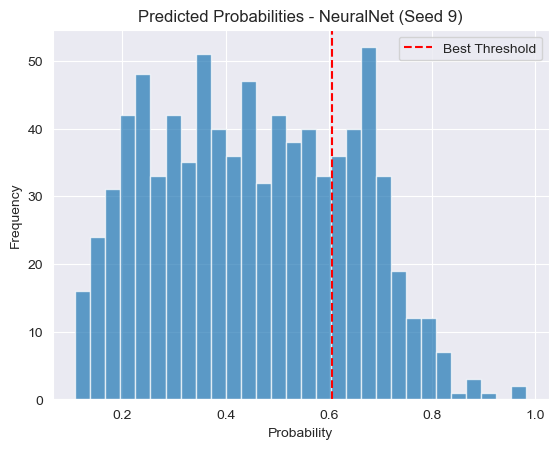

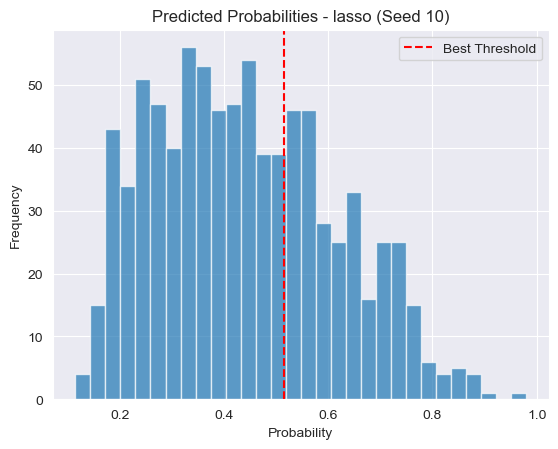

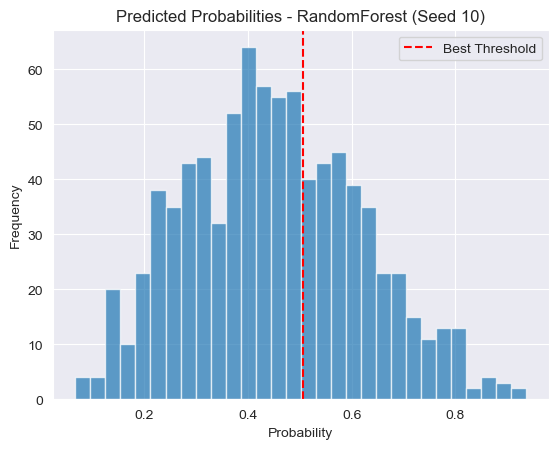

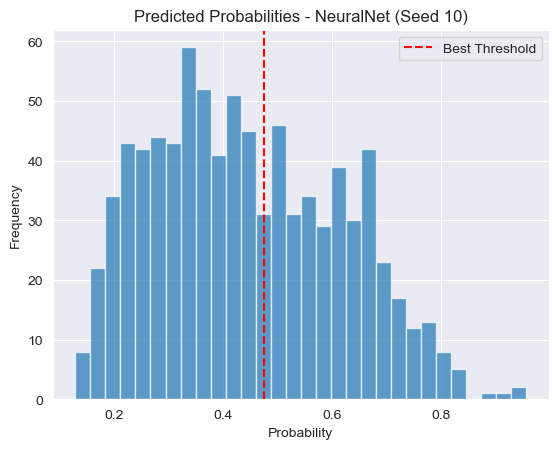

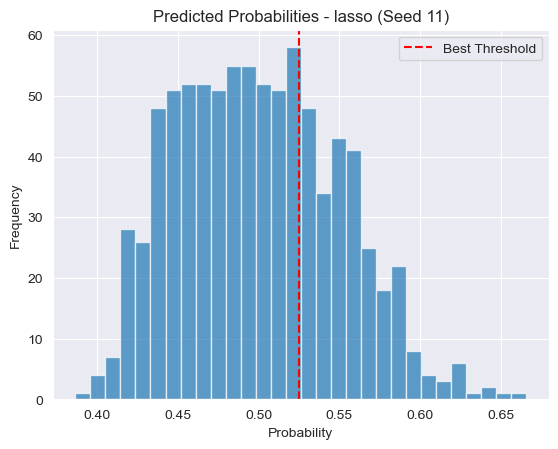

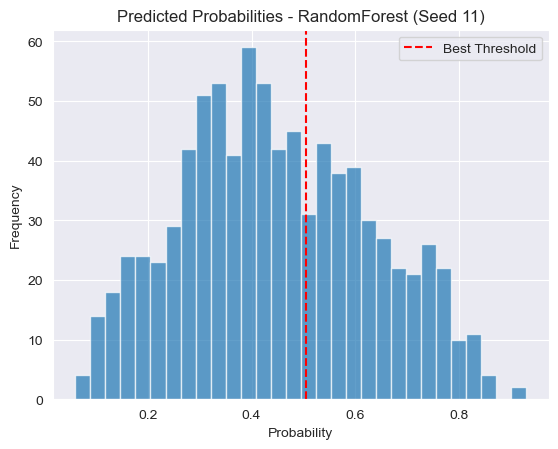

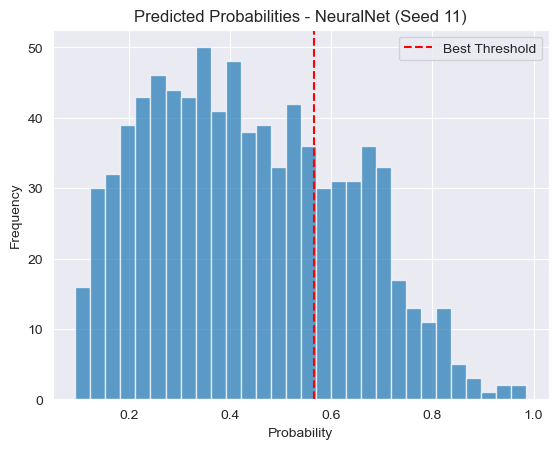

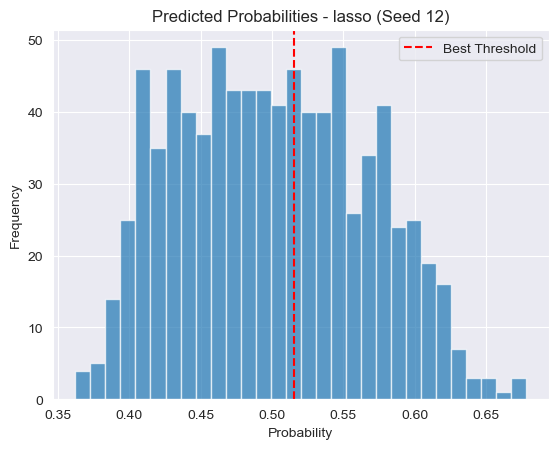

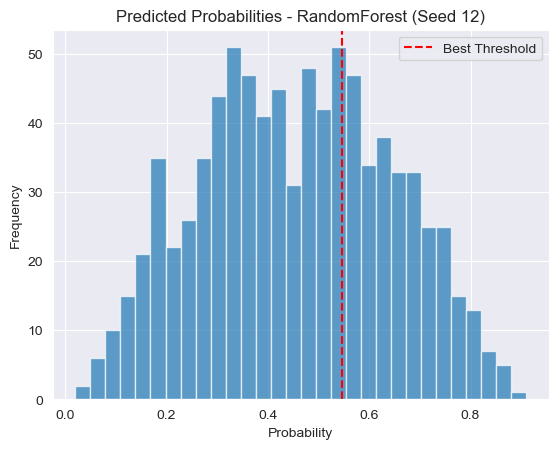

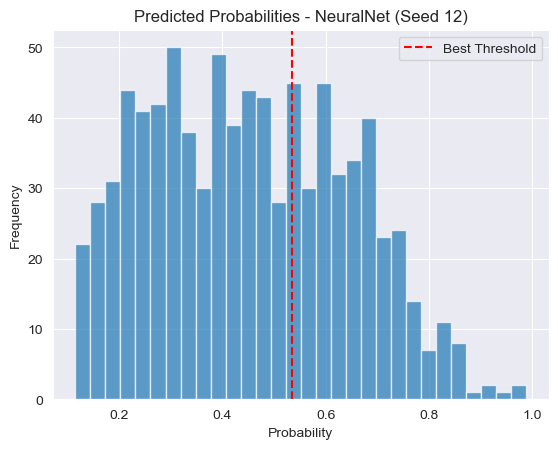

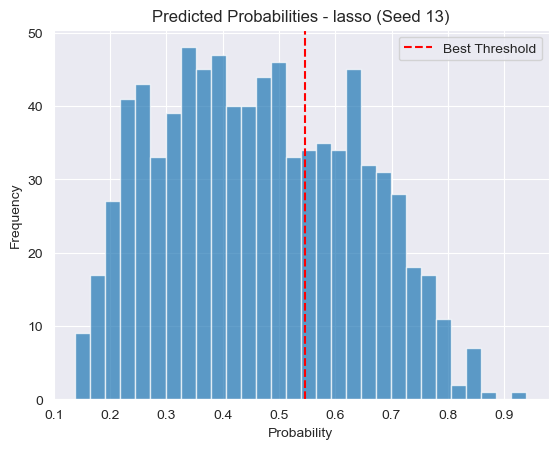

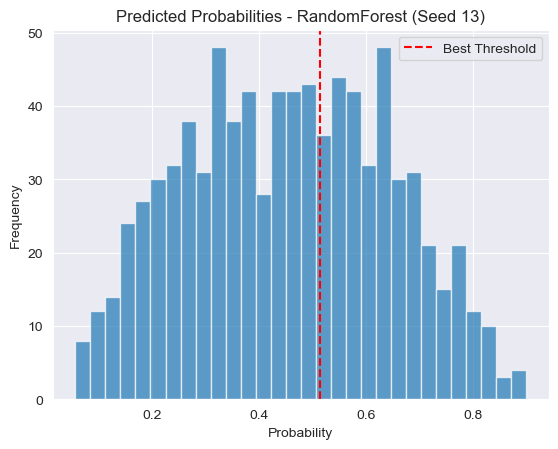

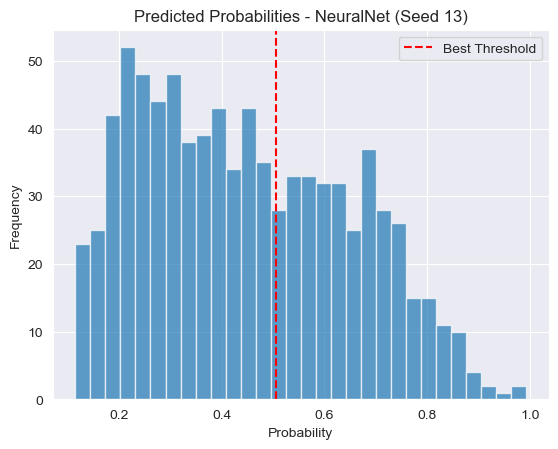

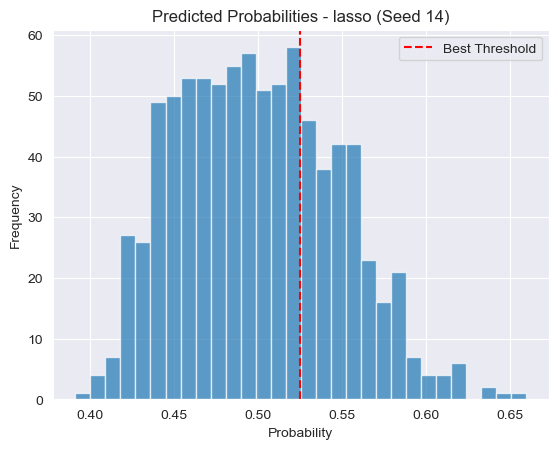

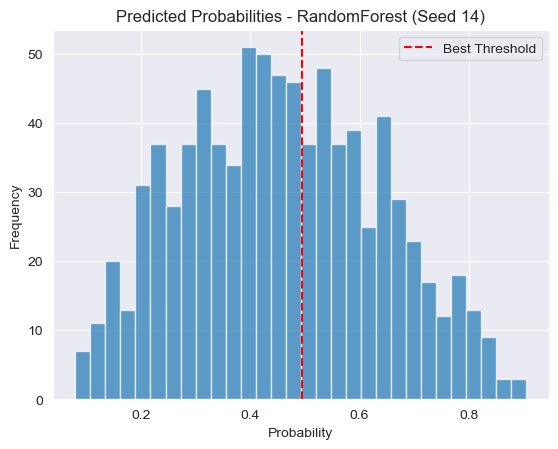

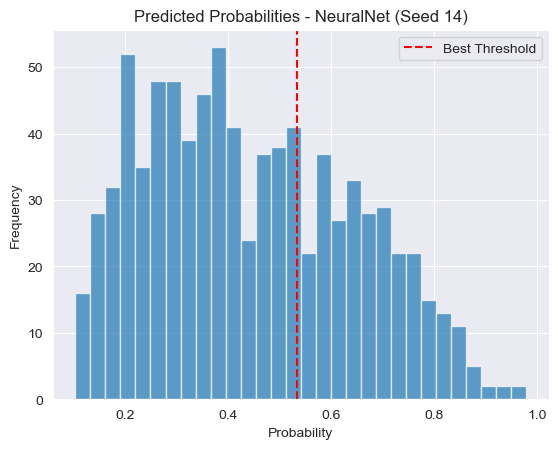

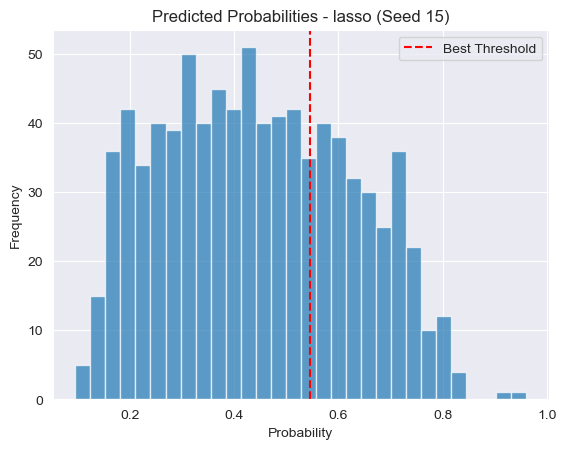

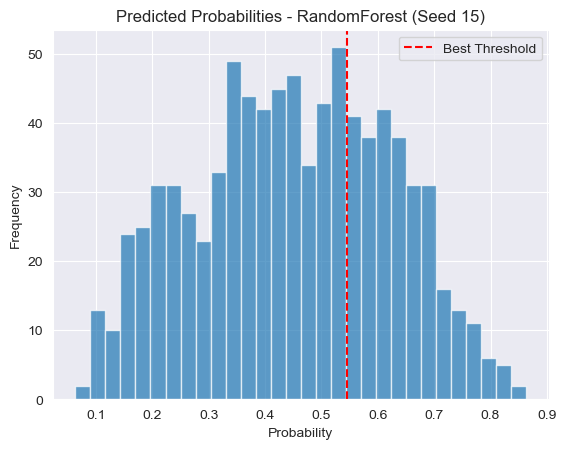

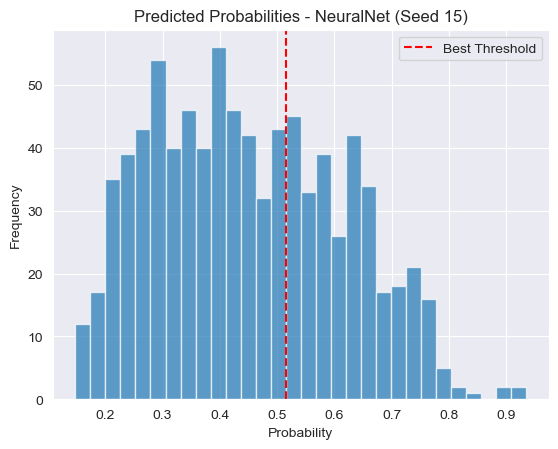

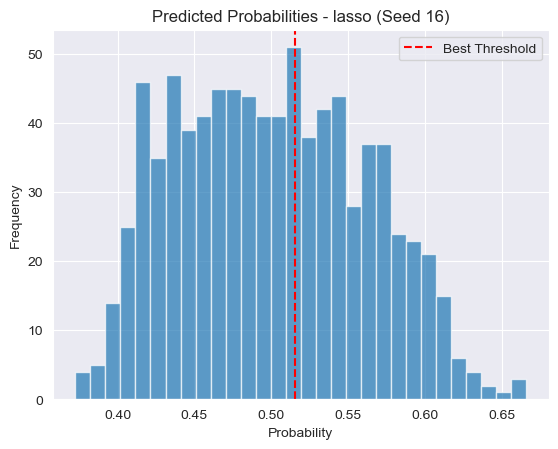

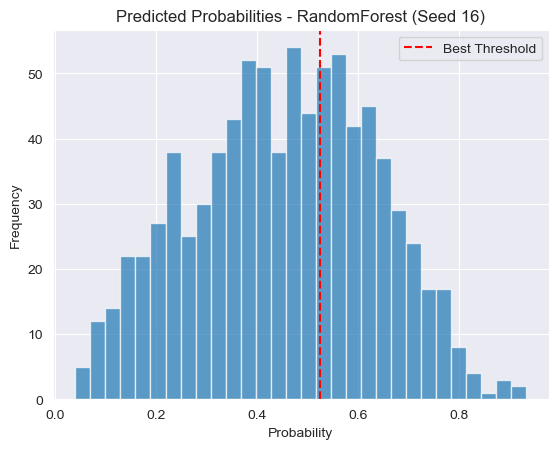

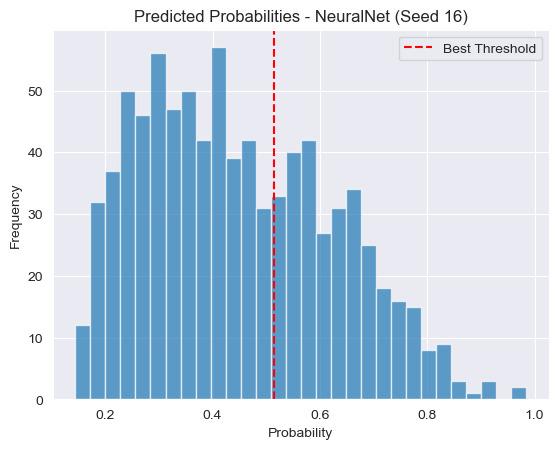

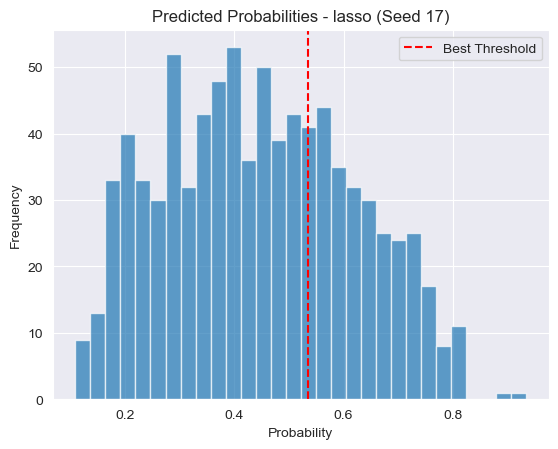

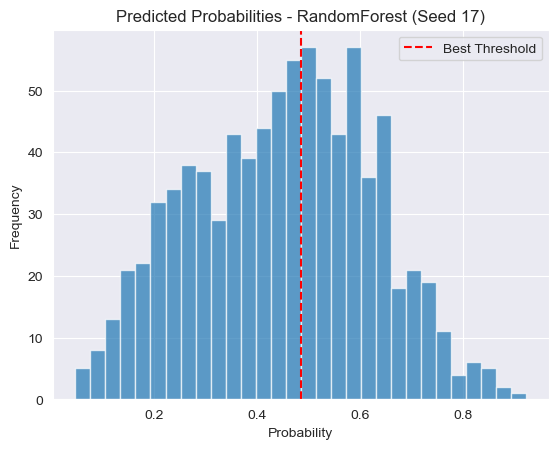

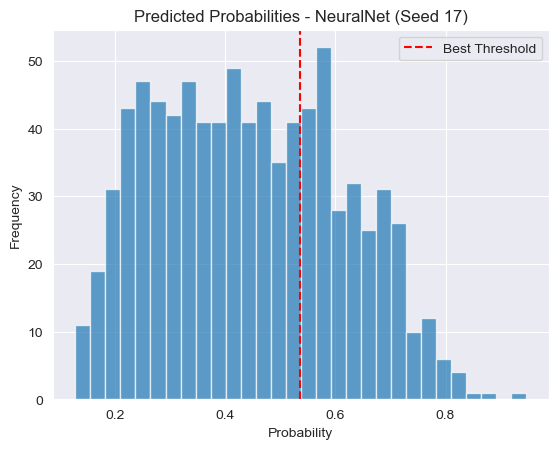

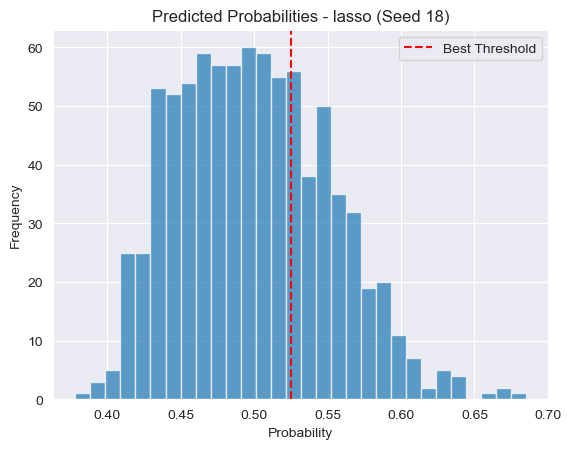

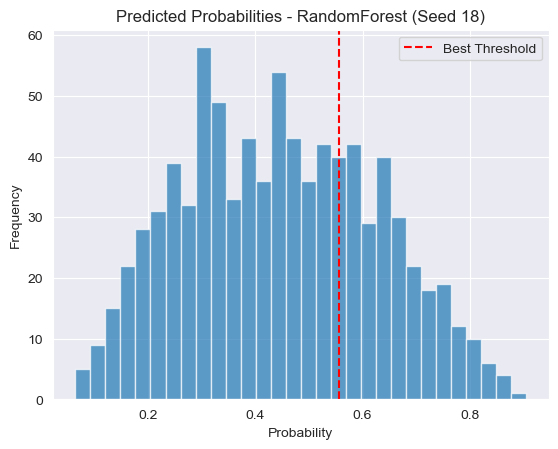

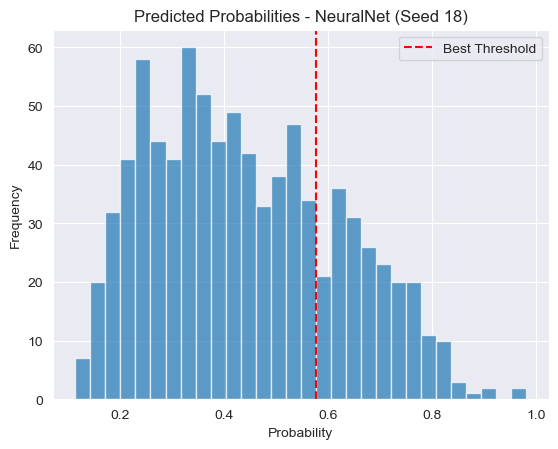

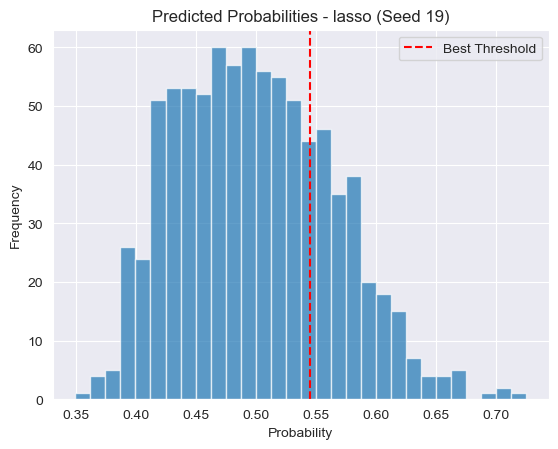

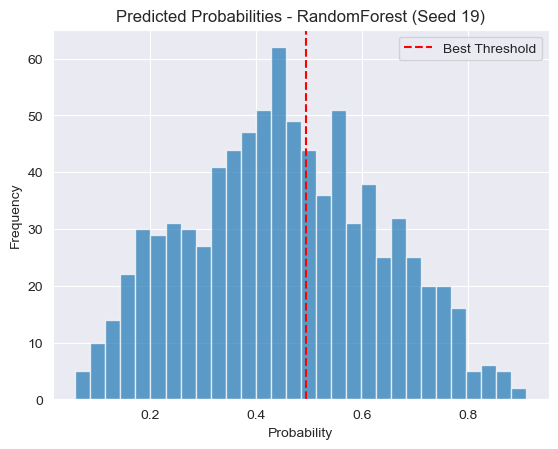

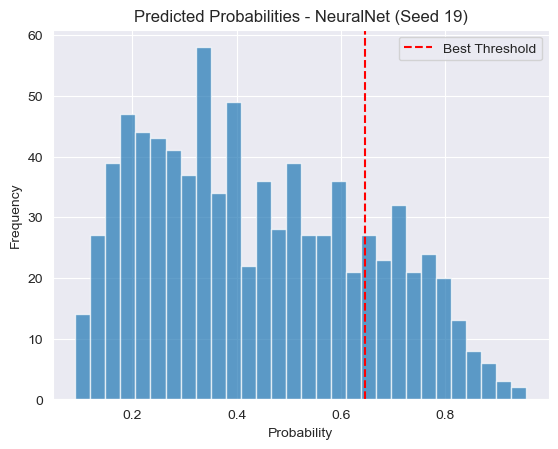

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

# Load CSV
df = pd.read_csv("../results/all_model_results.csv")

# Parse lists safely
df['y_pred'] = df['y_pred'].apply(ast.literal_eval)
df['y_prob'] = df['y_prob'].apply(ast.literal_eval)

# Fix NaNs before parsing
df['selected_features'] = df['selected_features'].fillna('[]').apply(ast.literal_eval)

# Plot F1 score comparison
plt.figure()
for model in df['model_name'].unique():
    subset = df[df['model_name'] == model]
    plt.plot(subset['seed'], subset['best_f1'], marker='o', label=model)
plt.title('F1 Score by Model and Seed')
plt.xlabel('Seed')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()


# Plot number of selected features per model
df['n_selected_features'] = df['selected_features'].apply(len)
plt.figure()
for model in df['model_name'].unique():
    subset = df[df['model_name'] == model]
    plt.plot(subset['seed'], subset['n_selected_features'], marker='s', label=model)
plt.title('Number of Selected Features by Model')
plt.xlabel('Seed')
plt.ylabel('Count of Selected Features')
plt.legend()
plt.grid(True)
plt.show()

# Create summary table: best F1 per model

summary_rows = []
for model in df['model_name'].unique():
    best_row = df[df['model_name'] == model].sort_values(by='best_f1', ascending=False).iloc[0]
    summary_rows.append({
        'Model': best_row['model_name'],
        'Best F1': best_row['best_f1'],
        'Seed': best_row['seed'],
        'Best Threshold': best_row['best_threshold'],
        'Selected Features / Params': (
            f"{len(best_row['selected_features'])} features, C={best_row['lasso_C']}"
            if model == 'lasso' else
            f"{best_row.get('hidden_size', 'N/A')} neurons, dropout {best_row.get('dropout', 'N/A')}"
            if model == 'NeuralNet' else
            f"{len(best_row['selected_features'])} features"
)

    })


summary_df = pd.DataFrame(summary_rows)

# Display as table plot
fig, ax = plt.subplots(figsize=(12, 1 + 0.5 * len(summary_df)))
ax.axis('off')
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.title("Best F1 Score Summary per Model", fontsize=14)
plt.show()

# Plot distribution of predicted probabilities for each model
for idx, row in df.iterrows():
    plt.figure()
    plt.hist(row['y_prob'], bins=30, alpha=0.7)
    plt.axvline(row['best_threshold'], color='r', linestyle='--', label='Best Threshold')
    plt.title(f"Predicted Probabilities - {row['model_name']} (Seed {row['seed']})")
    plt.xlabel("Probability")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()